completed


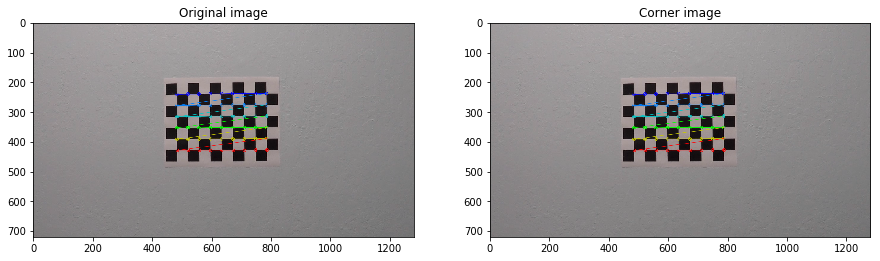

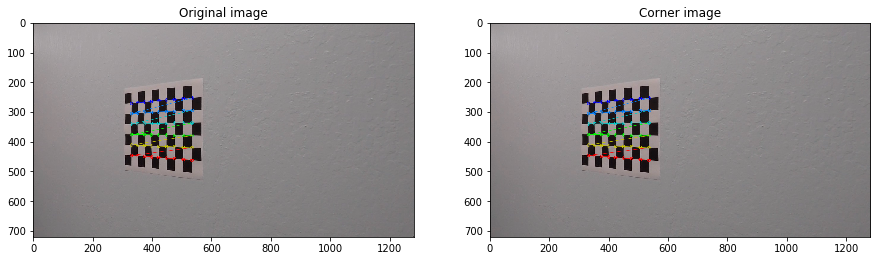

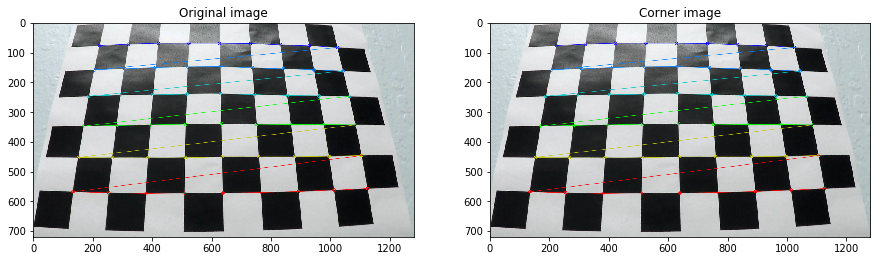

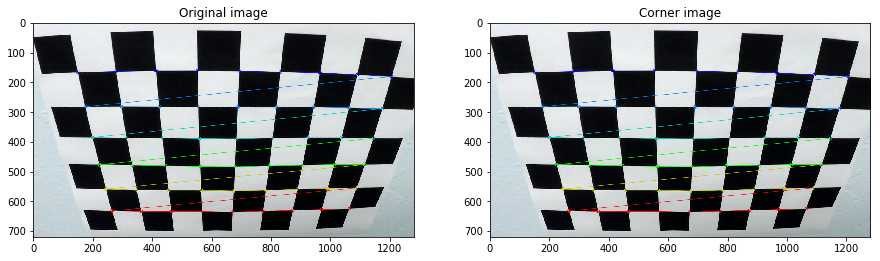

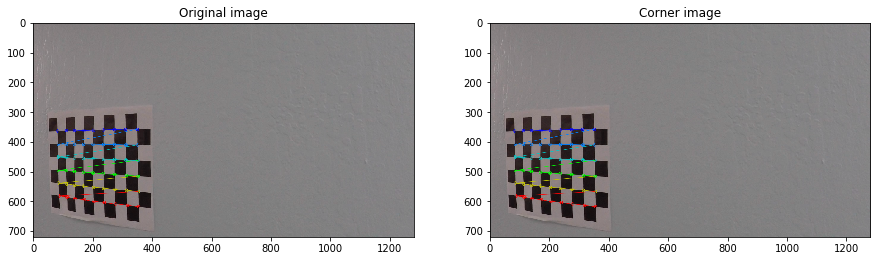

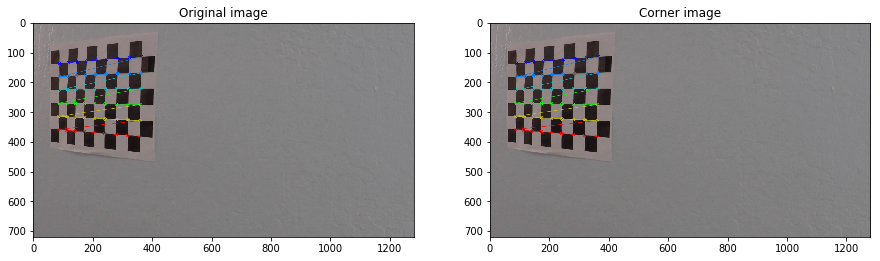

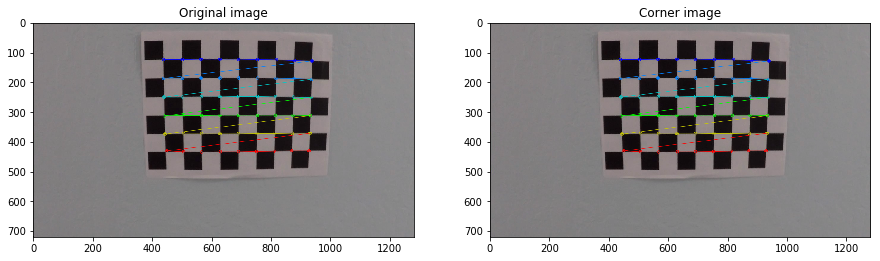

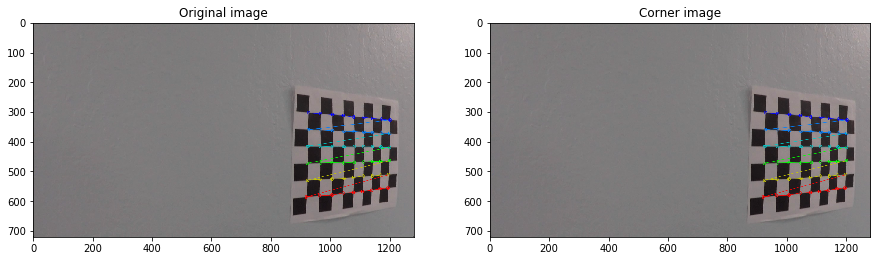

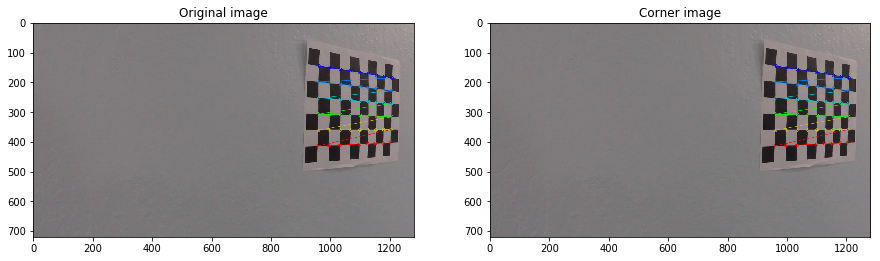

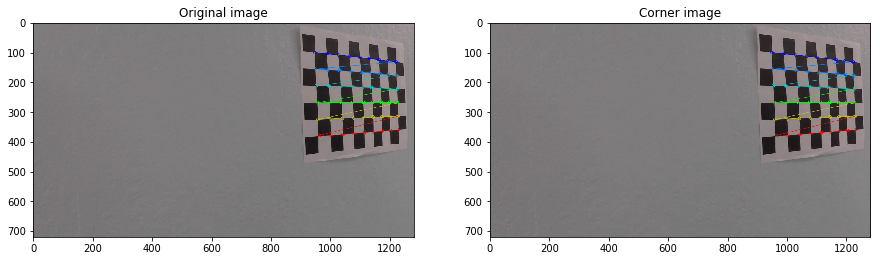

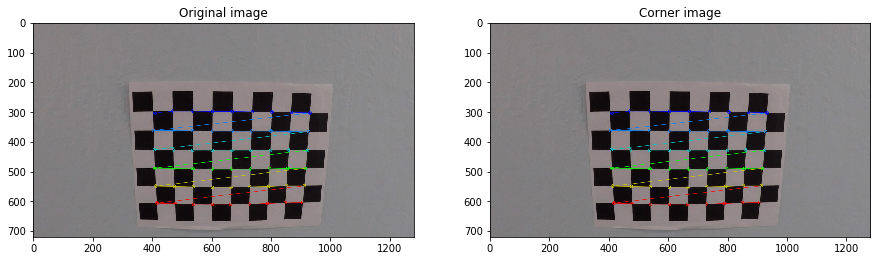

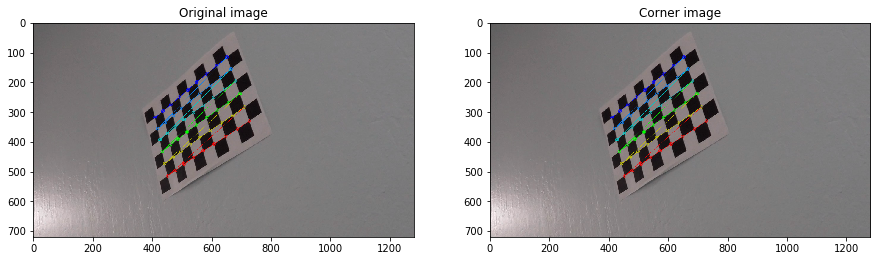

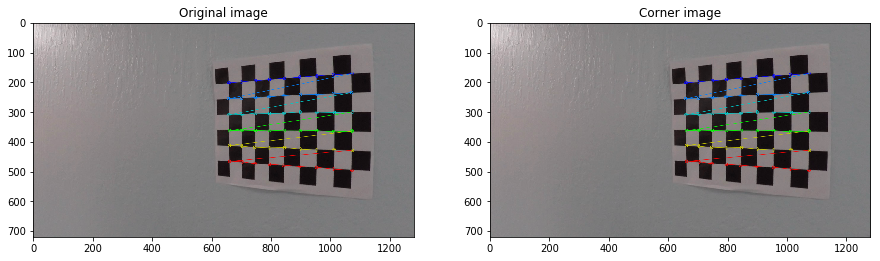

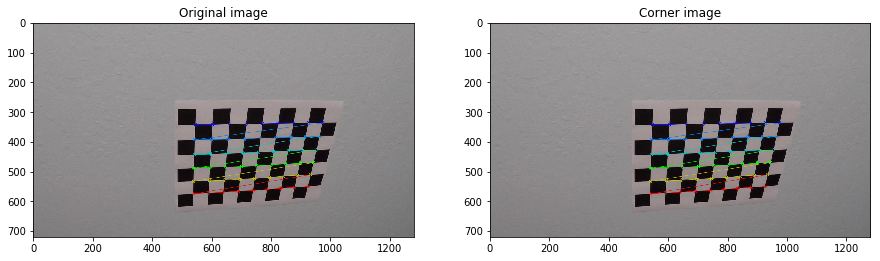

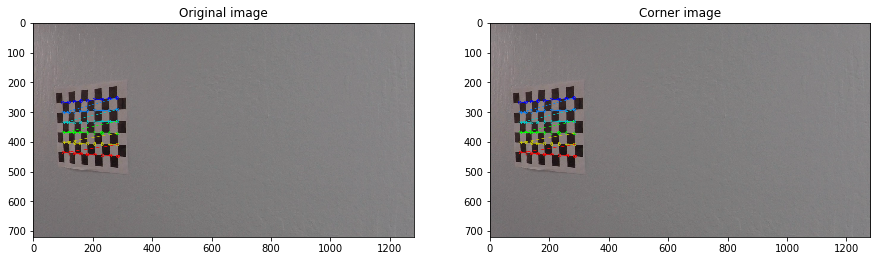

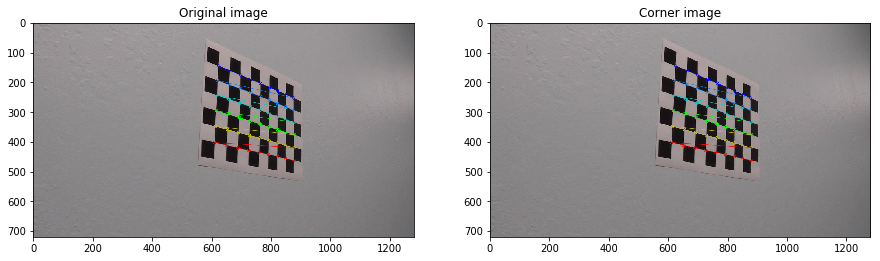

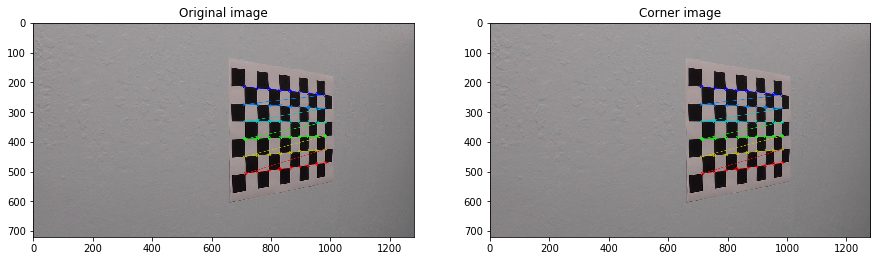

In [1]:
# Camera Calibration matrix and distortion coefiicients 
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

# Arrays to store object points and image points from all the images
objPoints = []
imgPoints = []
 
# prepare object points 
objP = np.zeros((6*9,3), np.float32)
objP[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #x, y coordinates

imgContainer = glob.glob('camera_cal/*.jpg')
for i, index in enumerate(imgContainer):
    image = cv2.imread(index)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
        imgPoints.append(corners)
        objPoints.append(objP)
        f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15,11))
        img = cv2.drawChessboardCorners(image, (9,6), corners, ret)
        axs1.set_title("Original image")
        axs1.imshow(image)
        axs2.set_title("Corner image")
        axs2.imshow(img)
print('completed')


# test image
test = cv2.imread('./test_images/test1.jpg')
testImage = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

### Testing undistortion

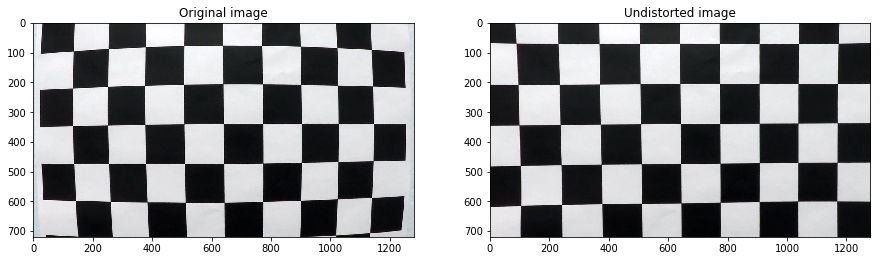

In [2]:
image = cv2.imread('./camera_cal/calibration1.jpg')
imgSize = (image.shape[1], image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, imgSize, None, None)
dst = cv2.undistort(image, mtx, dist, None, mtx)
f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15,11))
axs1.set_title("Original image")
axs1.imshow(image)
axs2.set_title("Undistorted image")
axs2.imshow(dst)

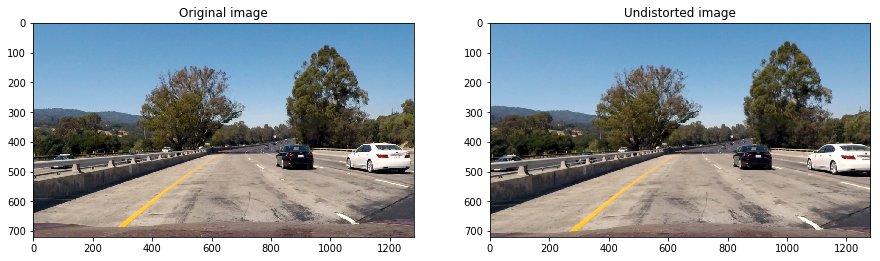

In [3]:
### Test Image 
# apply undistortion on the test image
undist = cv2.undistort(testImage, mtx, dist, None, mtx)
f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15,11))
axs1.set_title("Original image")
axs1.imshow(testImage)
axs2.set_title("Undistorted image")
axs2.imshow(undist)

### Applying Perspective Transform

In [4]:
# Perspective Transform
# define both source and destination points to get the perspective transform and
# then creare the wraped image

def perspectiveTransform(img, srcPoints, dstPoints):
    imgSize = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    warped = cv2.warpPerspective(img, M, imgSize)
    Minv = cv2.getPerspectiveTransform(dstPoints, srcPoints)

    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 11))
    f.tight_layout()
    ax1.imshow(cv2.cvtColor(undst, cv2.COLOR_BGR2RGB))
    ax1.set_title('Undistorted Image')
    ax2.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted and Warped Image')
    """
    return warped, M, Minv

Text(0.5,1,'Undistorted and Warped Image')

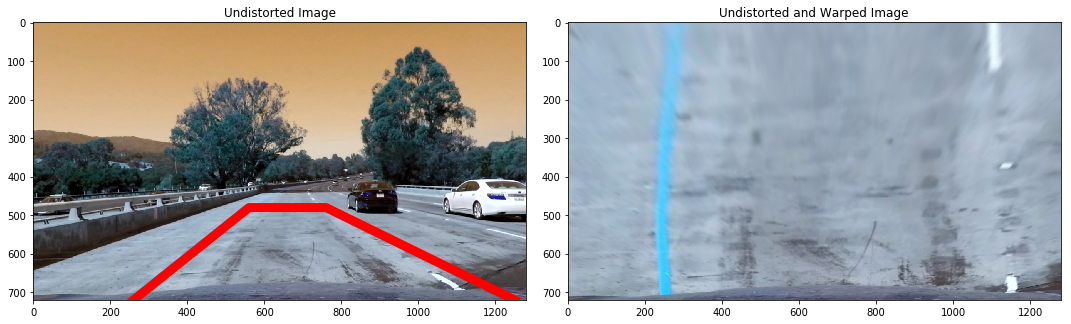

In [5]:
# test on a single image 
srcPoints = np.float32([[500, 480],[790, 480],[1280, 720],[220, 720]])
dstPoints = np.float32([[0, 0], [1250,0], [1280,720 ],[220,720]])

unWarpedTestImage, M, Minv = perspectiveTransform(undist, srcPoints, dstPoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 11))
f.tight_layout()
x = [260, 560, 760, 1250]
y = [720, 480, 480, 720]
# Color the selected region
ax1.plot(x, y, color='red', linewidth=9)
ax1.imshow(cv2.cvtColor(undist, cv2.COLOR_BGR2RGB))
ax1.set_title('Undistorted Image')
ax2.imshow(cv2.cvtColor(unWarpedTestImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted and Warped Image')

Text(0.5,1,'B Image')

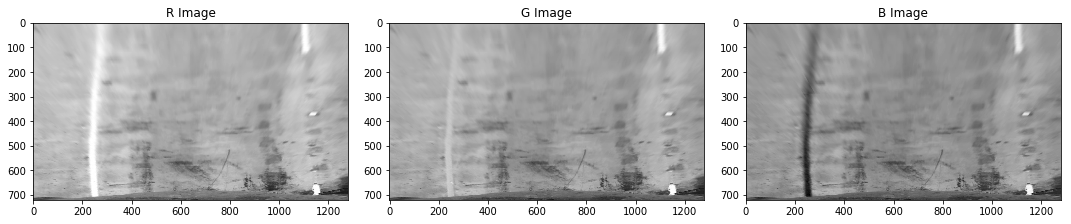

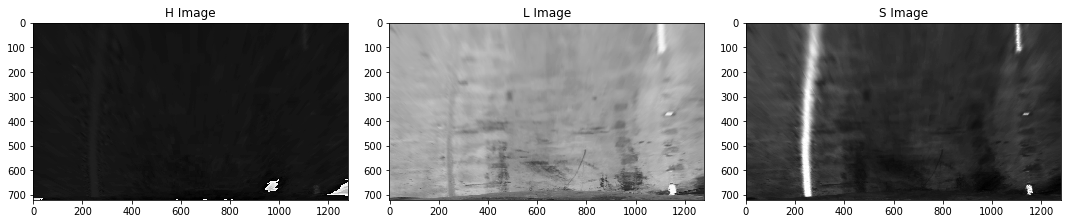

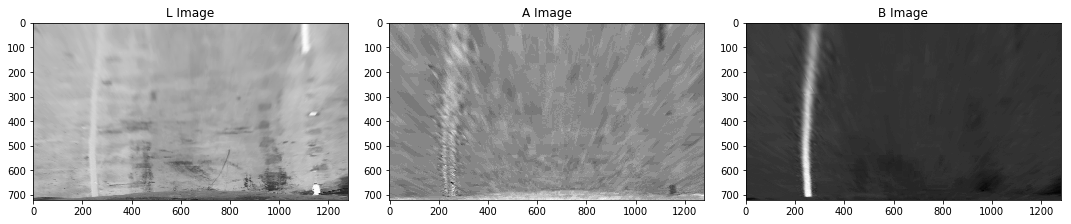

In [6]:
### testing on the images using differnet color channels
# RGB warped test image
rgb = unWarpedTestImage
r_channel = rgb[:,:,0]
g_channel = rgb[:,:,1]
b_channel = rgb[:,:,2]

hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)
la_channel = lab[:,:,0]
a_channel = lab[:,:,1]
ba_channel = lab[:,:,2]



f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 11))
f.tight_layout()
ax1.imshow(r_channel, cmap='gray')
ax1.set_title('R Image')
ax2.imshow(g_channel, cmap='gray')
ax2.set_title('G Image')
ax3.imshow(b_channel, cmap='gray')
ax3.set_title('B Image')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 11))
f.tight_layout()
ax1.imshow(h_channel, cmap='gray')
ax1.set_title('H Image')
ax2.imshow(l_channel, cmap='gray')
ax2.set_title('L Image')
ax3.imshow(s_channel, cmap='gray')
ax3.set_title('S Image')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 11))
f.tight_layout()
ax1.imshow(la_channel, cmap='gray')
ax1.set_title('L Image')
ax2.imshow(a_channel, cmap='gray')
ax2.set_title('A Image')
ax3.imshow(ba_channel, cmap='gray')
ax3.set_title('B Image')

In [7]:
# applying Thresholds
def sobel_thresh(imgContainer, orient='x', typeOf='rgb',  thresh=(0,255)):
    if typeOf == hls:
        gray = cv2.cvtColor(imgContainer, cv2.COLOR_RGB2HLS)[:,:,1]
    elif typeOf == lab:
        gray = cv2.cvtColor(imgContainer, cv2.COLOR_RGB2Lab)[:,:,0]
    else:
        gray = imgContainer[:,:,1]
    if orient=='x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sxbinary
print("Completed")

Completed


### Applying the sobel threshold to the test image(unwarped)

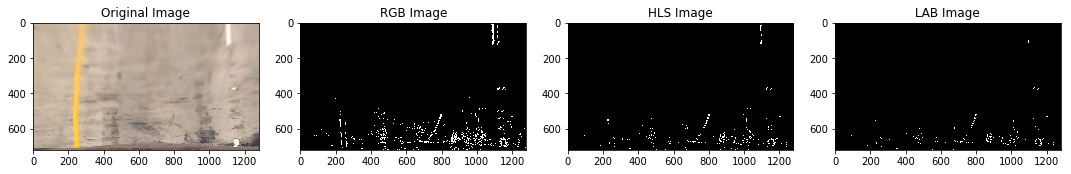

In [8]:
sobelTestImage = unWarpedTestImage
threshRGB = sobel_thresh(sobelTestImage, orient='x', typeOf='rgb', thresh=(20, 255))
threshHLS = sobel_thresh(sobelTestImage, orient='x', typeOf='hls', thresh=(30, 140))
threshLab = sobel_thresh(sobelTestImage, orient='x', typeOf='lab', thresh=(35, 140))


f, (axs1, axs2, axs3, axs4) = plt.subplots(1, 4, figsize=(15, 11))
f.tight_layout()

axs1.set_title("Original Image")
axs1.imshow(sobelTestImage)

axs2.set_title("RGB Image")
axs2.imshow(threshRGB, cmap='gray')

axs3.set_title("HLS Image")
axs3.imshow(threshHLS, cmap='gray')

axs4.set_title("LAB Image")
axs4.imshow(threshLab, cmap='gray')

### Applying magnitude threshold

In [9]:
# magnitude threshold
def mag_thresh(img, sobel_kernel=3, thresh=(0,255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh[0]) & (gradmag <= thresh[1])] = 1
    return binary_output
print("Completed")

Completed


### Applying the sobel magnitude threshold to the test image(unwarped)

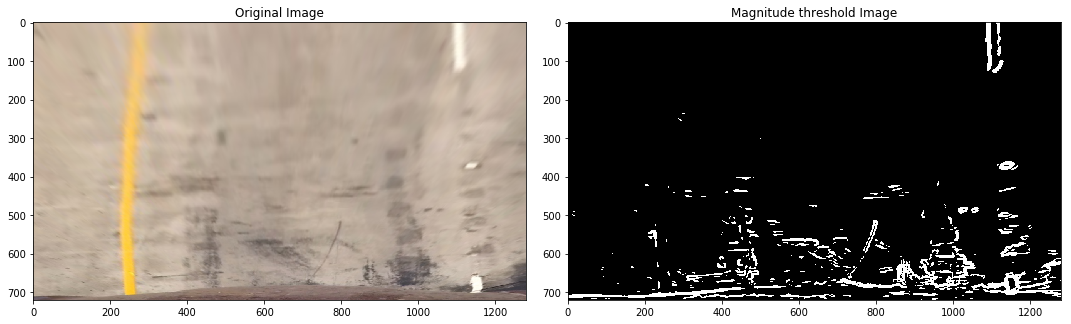

In [10]:
magTestImage = unWarpedTestImage
threshMag = mag_thresh(magTestImage, sobel_kernel=25, thresh=(30,220))

f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 11))
f.tight_layout()
axs1.set_title("Original Image")
axs1.imshow(magTestImage)
axs2.set_title("Magnitude threshold Image")
axs2.imshow(threshMag, cmap='gray')

### Applying direction threshold 

In [11]:
def dir_thresh(img, sobel_kernel=3, thresh=(0,np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    absX = np.absolute(sobelx)
    absY = np.absolute(sobely)
    angle = np.arctan2(absY,absX)
    binary_output = np.zeros_like(absY)
    binary_output[(angle >= thresh[0]) & (angle <= thresh[1])] = 1
    return binary_output

### Applying the sobel magnitude threshold to the test image(unwarped)

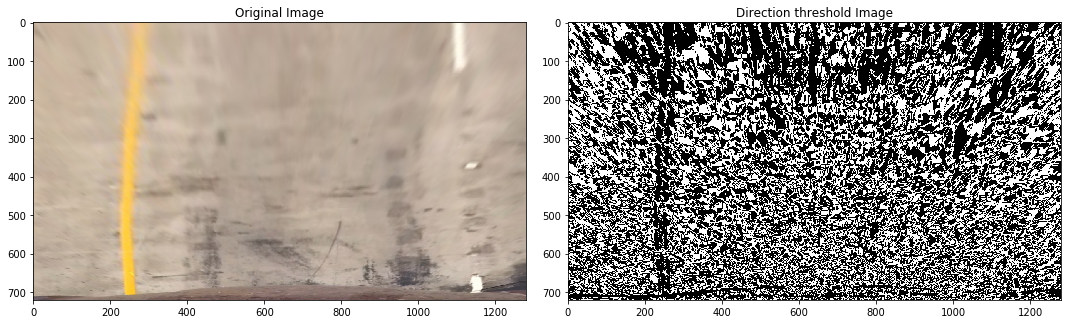

In [12]:
dirTestImage = unWarpedTestImage
kernel_size = 15
threshDir = dir_thresh(dirTestImage, kernel_size, thresh=(0.6, 1.3))
f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 11))
f.tight_layout()
axs1.set_title("Original Image")
axs1.imshow(dirTestImage)
axs2.set_title("Direction threshold Image")
axs2.imshow(threshDir, cmap='gray')

### Applying different combinations of threshold

In [13]:
def comb_thresh(img, ksize):
    threshMag = mag_thresh(img, sobel_kernel=ksize, thresh=(20,220))
    threshDir = dir_thresh(img, sobel_kernel=ksize, thresh=(0.7,1.3))

    combinedImg = np.zeros_like(threshDir)
    combinedImg[(threshMag == 1) & (threshDir == 1)] = 1
    return combinedImg

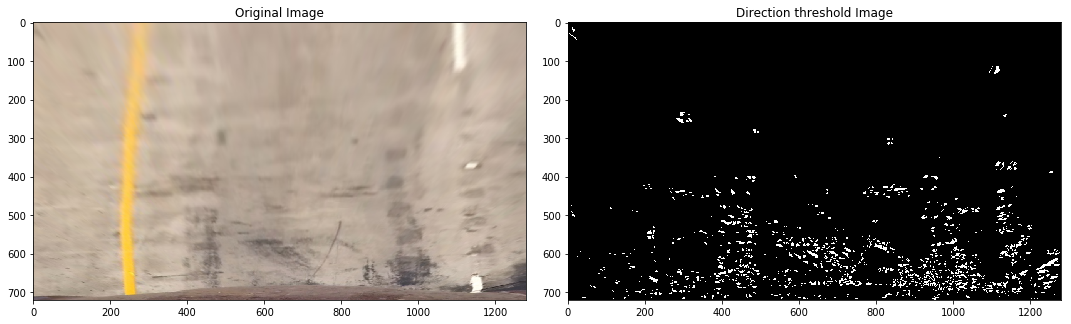

In [14]:
combTestImage = unWarpedTestImage
ksize = 25
threshComb = comb_thresh(dirTestImage, ksize)

f, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 11))
f.tight_layout()
axs1.set_title("Original Image")
axs1.imshow(combTestImage)
axs2.set_title("Direction threshold Image")
axs2.imshow(threshComb, cmap='gray')

In [15]:
## Applying thresholds to sobel images 
def color_thresh(img, thresh=(100,255), typeOf='rgb'):
    if typeOf == 'hls':
        image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,1]
        image = image*(255/np.max(image))
    elif typeOf == 'lab':
        image = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)[:,:,2]
        if np.max(image) > 175:
            image = image*(255/np.max(image))
    else:
        image = img[:,:,0]
        image = image*(255/np.max(image))
    hlsOutput = np.zeros_like(image)
    hlsOutput[(image > thresh[0]) & (image <= thresh[1])] = 1
    return hlsOutput


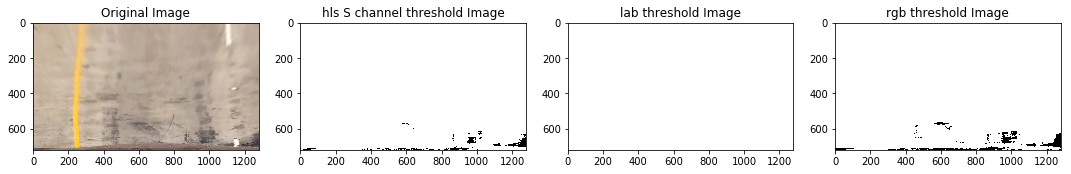

In [16]:
TestImage = unWarpedTestImage
thresh= (100, 255)
hlsThresh = color_thresh(TestImage, thresh, typeOf='hls')

thresh = (120,255)
labThresh = color_thresh(TestImage, thresh, typeOf='lab') 

thresh = (120,255)
rbgThresh = color_thresh(TestImage, thresh, typeOf='rgb')

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 11))
f.tight_layout()
ax1.set_title("Original Image")
ax1.imshow(TestImage)
ax2.set_title("hls S channel threshold Image")
ax2.imshow(hlsThresh, cmap='gray')
ax3.set_title("lab threshold Image")
ax3.imshow(labThresh, cmap='gray')
ax4.set_title("rgb threshold Image")
ax4.imshow(rbgThresh, cmap='gray')

### creating pipeline to complete the whole model

In [17]:
def pipeline(img):
    undistortImage = cv2.undistort(img, mtx, dist, None, mtx)
    unwarpImage, M, Minv = perspectiveTransform(undistortImage, srcPoints, dstPoints)
    thresh= (220, 255)
    s_thresh = color_thresh(unwarpImage, thresh, typeOf='hls')
    thresh= (190, 255)
    l_thresh = color_thresh(unwarpImage, thresh, typeOf='lab')
    combined = np.zeros_like(s_thresh)
    combined[(s_thresh == 1) | (l_thresh == 1)] = 1
    return combined, M,Minv

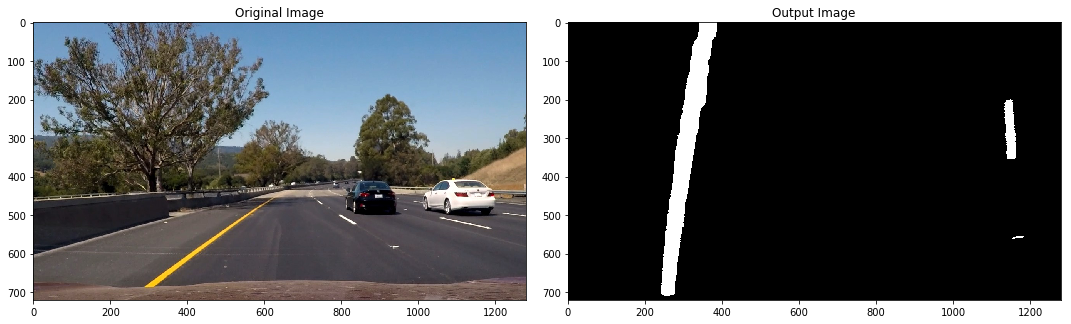

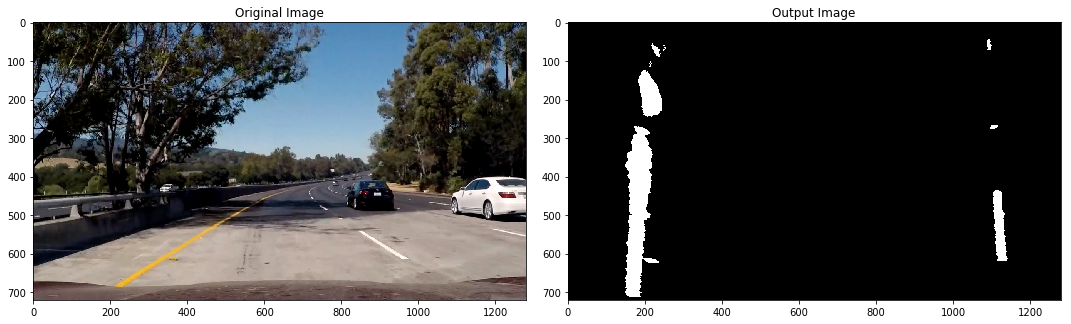

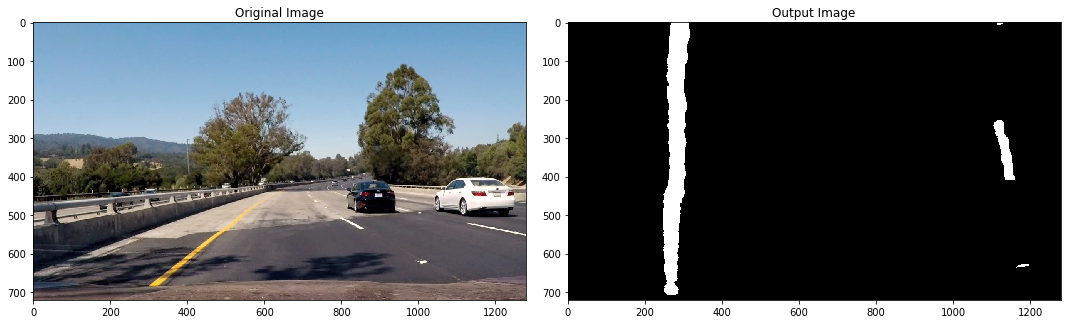

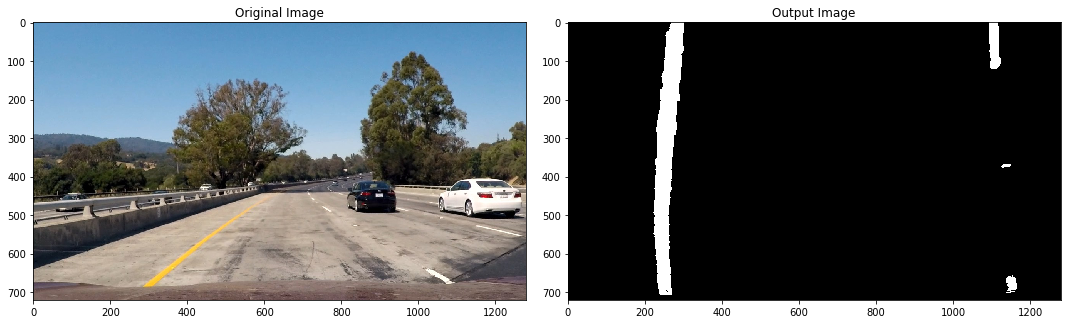

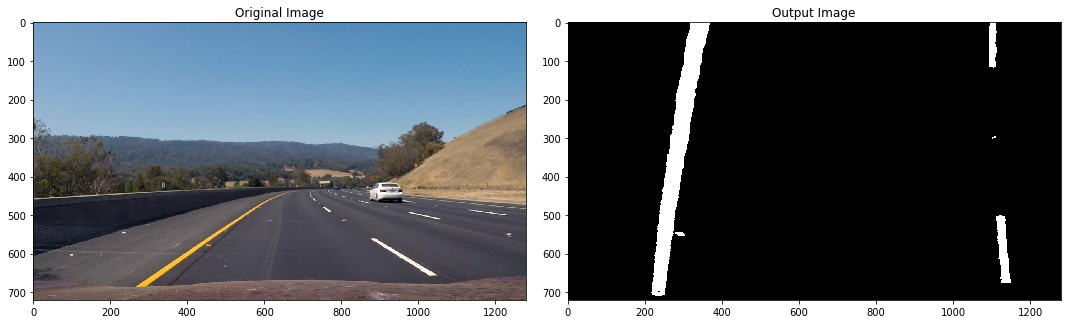

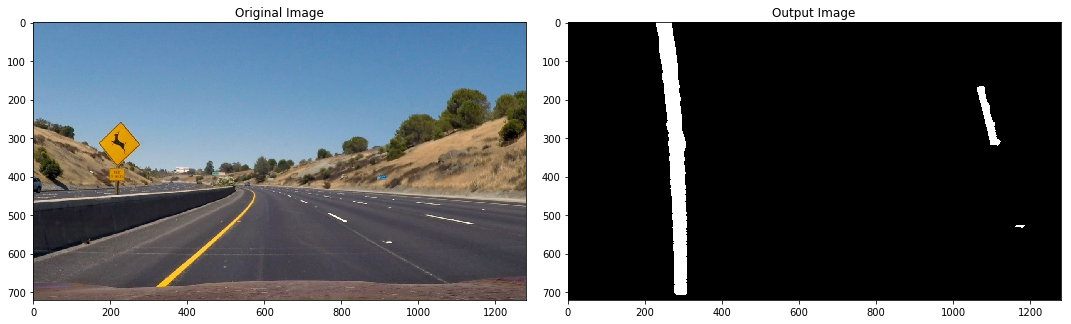

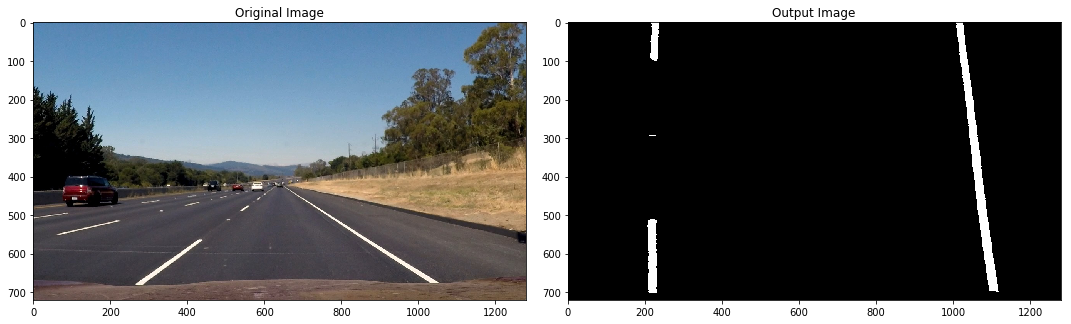

In [18]:
images = glob.glob('./test_images/*.jpg')
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_out, M, Minv = pipeline(img)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 11))
    f.tight_layout()
    ax1.set_title("Original Image")
    ax1.imshow(img)
    ax2.set_title("Output Image")
    ax2.imshow(img_out, cmap='gray')    

### Sliding window fitting of the line


In [19]:
def slidingWindow(img):
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 70
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    out_img = []
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        out_img.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high)) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit, right_fit = (None, None)
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
        
    visualData = (out_img, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualData
print("completed")

completed


(720, 0)

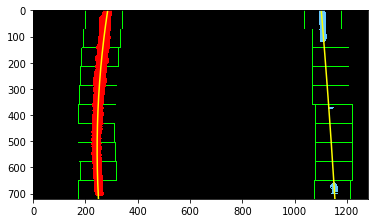

In [20]:
# visualizing the data
# Generate x and y values for plotting
testImageSliding = cv2.imread('./test_images/test1.jpg')
testImageSliding = cv2.cvtColor(testImageSliding, cv2.COLOR_BGR2RGB)
threshSLImage, M, Minv = pipeline(testImageSliding)
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = slidingWindow(threshSLImage)

h = threshSLImage.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((threshSLImage, threshSLImage, threshSLImage))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, threshSLImage.shape[0]-1, threshSLImage.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
nonzero = threshSLImage.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)


In [21]:
plt.plot(histogram)
plt.xlim(0, 1280)

(0, 1280)

In [22]:
# Define method to fit polynomial to binary image based upon a previous fit (chronologically speaking);
# this assumes that the fit will not change significantly from one video frame to the next
def fitlaneLines(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds
print('...')

...


(720, 0)

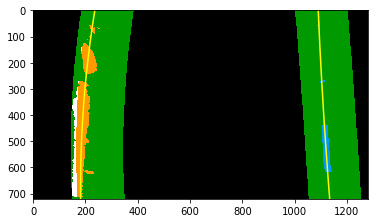

In [23]:
# visualize the result
testImage = cv2.imread('./test_images/test5.jpg')
testImage = cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB)
testImageOut, M, Minv = pipeline(testImage)   
margin = 100

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = fitlaneLines(testImageOut, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, testImageOut.shape[0]-1, testImageOut.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((testImageOut, testImageOut, testImageOut))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = testImageOut.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.6, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

### Measuring the curvature

In [24]:
def getCurvDist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist


In [25]:
leftRadi, rightRadi, center = getCurvDist(testImage, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', leftRadi, rightRadi)
print('Distance from lane center for example:', center)

Radius of curvature for example: 140352592.41 631248371.164
Distance from lane center for example: -0.605987567242


In [26]:
def postLane(original_img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result
print("Completed")

Completed


In [27]:
# visualize the result on example image
inputImage = cv2.imread('./test_images/test1.jpg')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputPipe, M, Minv = pipeline(inputImage) 
output1 = postLane(inputImage, inputPipe, left_fit, right_fit, Minv) 
plt.imshow(output1)
print("Completed")

Completed


In [28]:
# add driving data on top of the image
curveSize = abs((leftRadi+rightRadi)//2)
def putData(inputImage,curveSize, center):
    output = np.copy(inputImage)
    h = inputImage.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curveSize) + 'm'
    cv2.putText(output, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if curveSize > 620:
        direction = 'right'
    else:
        direction = 'left'
    text = '{:04.3f}'.format(center) + 'm ' + direction + ' of center'
    cv2.putText(output, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return output
print("Completed")

Completed


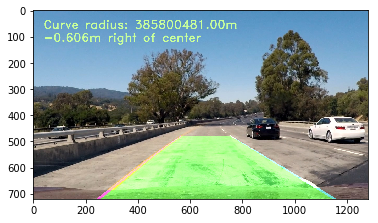

In [29]:
input2 = putData(output1, curveSize, center)
plt.imshow(input2)

### Define a line class

### Creating the final pipeline

In [30]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


            

print('...')

...


In [58]:
def process_image(img):
    new_img = np.copy(img)
    img_bin,M, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, visual_Data = slidingWindow(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = fitlaneLines(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    img_out1 = postLane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
    plt.imshow(img_out1)
    #rad_l, rad_r, d_center = getCurvDist(img_out1, l_line.best_fit, r_line.best_fit, l_lane_inds, r_lane_inds)
    #img_out = putData(img_out1, (rad_l+rad_r)/2, d_center)


    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) + \
                                    ' {:0.6f}'.format(l_fit[1]) + \
                                    ' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) + \
                                    ' {:0.6f}'.format(r_fit[1]) + \
                                    ' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + \
                                ' {:0.6f}'.format(l_line.best_fit[1]) + \
                                ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + \
                                ' {:0.6f}'.format(r_line.best_fit[1]) + \
                                ' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) + \
                             ' {:0.6f}'.format(l_line.diffs[1]) + \
                             ' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or \
           l_line.diffs[1] > 1.0 or \
           l_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) + \
                             ' {:0.6f}'.format(r_line.diffs[1]) + \
                             ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or \
           r_line.diffs[1] > 1.0 or \
           r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out1
print('...')

...


In [32]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img
print('...')


...


[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [01:31<00:00, 13.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 1min 45s, sys: 13 s, total: 1min 58s
Wall time: 1min 32s


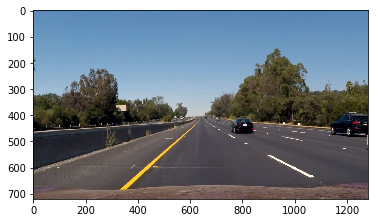

In [59]:


l_line = Line()
r_line = Line()

#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)